# 数据导入、数据可视化及探索性分析

## 数据的导入
我们首先在本地下载了了akshare的数据库，并且从本地读取

In [1]:
import pandas as pd #导入数据分析库
import akshare as ak
from matplotlib import pyplot as plt


下面对数据进行清洗并添加新索引

In [ ]:
def statisticsGet(stockCode,stockRenewed=""):
    datatable=ak.stock_zh_a_daily(symbol=stockCode,adjust=stockRenewed)
    #删掉空行并对数据重新排序 
    datatable=datatable.dropna()
    datatable=datatable.reset_index()
    return  datatable


下面再取出时间

In [ ]:
def timeGet(DataTable,ListName='date'):
    raw_time = pd.to_datetime(DataTable.pop(ListName), format='%Y/%m/%d %H:%M')
   
    return raw_time
# 折线图
def plotTrend(DataTable,Raw_time,Listname='close'):
    plt.plot(Raw_time, DataTable[Listname])
    plt.xlabel('Time')
    plt.ylabel('Share Price')
    plt.title('Trend')
    plt.show()
 

以下为导入的股票信息部分展示：
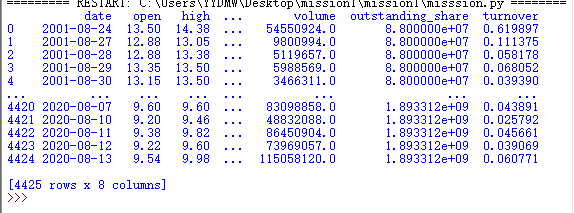

## 数据可视化
下面我们使用[matplotlib](https://matplotlib.org/)以及[seaborn ](http://seaborn.pydata.org/)两种可视化工具

In [2]:
# 热力图
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import akshare as ak
 

def heatmap(datatable):
    '''
    相关系数热力图
    '''
    correlation = datatable.corr()
    sns.heatmap(correlation, annot=True)
    plt.show()
 

In [ ]:
# 直方图
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
def histogram(datatable,period):
    '''
    获得增长率的直方图
    '''
    daily_return = datatable['close'][0::period].pct_change().dropna()
    plt.hist(daily_return)
    plt.show()


In [ ]:
# 涨跌幅度
import matplotlib.pyplot as plt
def Range_of_decline_and_rise_plot(a,b):
    daily_return = a['close'][::240].pct_change().dropna()
    plt.plot(b[240::240][:40],daily_return[:40])
    plt.xlabel('Time')
    plt.ylabel('Rise and Fall') 
    plt.title('Range of decline and rise')
    plt.show()


In [ ]:
# 散点图
import matplotlib.pyplot as plt
def scatter_plot(a,s=1):
    plt.scatter(a['volume'][:s], a['close'][:s])
    plt.xlabel('Volume')
    plt.ylabel('Share Price')
    plt.title('Volume & Share Price')
    plt.show()

现在我们选用数据中一条名为"sh600418"的数据并画出相对应图表

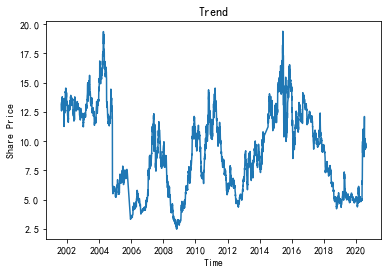

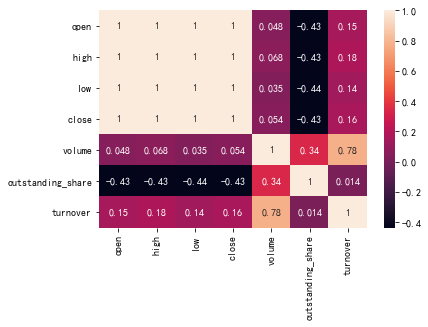

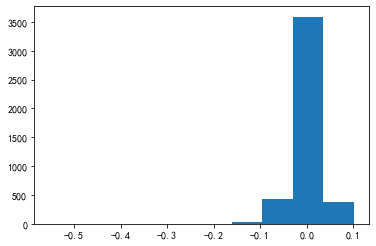

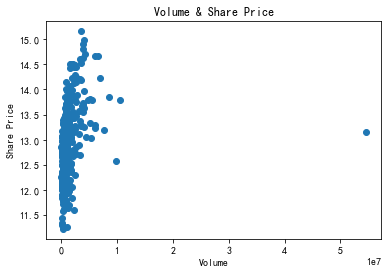

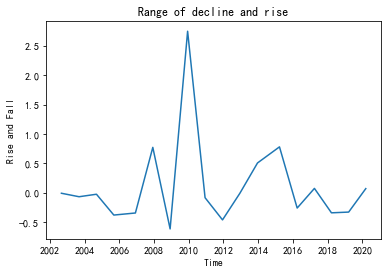

In [2]:
import misssion as ms
import heatmap as ht
import histogram as hg
import scatter_plot as sp
import range as rg
a=ms.statisticsGet('sh600418')
b=ms.timeGet(a)
ms.plotTrend(a,b)
ht.heatmap(a)
hg.histogram(a,1)
sp.scatter_plot(a,400)
rg.Range_of_decline_and_rise_plot(a,b)


以上便是本次作业的内容